# console : mlflow ui
# Accès console MLFlow : http://127.0.0.1:5000
# 1 - Chargement & configuration

In [1]:
import sys
import os
sys.path.append('../src')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from requirements import *
from src import data_preprocessing as dp
from src import model_training as mt
from src import evaluate as ev
from src import utils

import mlflow
mlflow.set_experiment("Sentiment Analysis Project")

c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




✅ Toutes les librairies sont présentes et prêtes à être utilisées !



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/906586012259731436', creation_time=1742576058928, experiment_id='906586012259731436', last_update_time=1742576058928, lifecycle_stage='active', name='Sentiment Analysis Project', tags={}>

## 1.1 - Affichage de la structure dossier

In [2]:
utils.afficher_structure_dossier("..", max_niveaux = 1)

├── .git
├── ├── COMMIT_EDITMSG
├── ├── FETCH_HEAD
├── ├── HEAD
├── ├── config
├── ├── description
├── ├── hooks
├── ├── index
├── ├── info
├── ├── logs
├── ├── objects
├── └── refs
├── .gitattributes
├── .gitignore
├── README.md
├── data
├── └── tweets.csv
├── env_p7_MLOps
├── ├── Include
├── ├── Lib
├── ├── Scripts
├── ├── etc
├── ├── pyvenv.cfg
├── └── share
├── logs
├── ├── events.out.tfevents.1741361244.PC-ARNAUD.37024.0
├── ├── events.out.tfevents.1741362034.PC-ARNAUD.9628.0
├── ├── events.out.tfevents.1741364804.PC-ARNAUD.38328.0
├── ├── events.out.tfevents.1741507476.PC-ARNAUD.3024.0
├── ├── events.out.tfevents.1741507646.PC-ARNAUD.3024.1
├── ├── events.out.tfevents.1741513667.PC-ARNAUD.13340.0
├── ├── events.out.tfevents.1741599815.PC-ARNAUD.27736.0
├── ├── events.out.tfevents.1741603247.PC-ARNAUD.3852.0
├── ├── events.out.tfevents.1741603852.PC-ARNAUD.24400.0
├── ├── events.out.tfevents.1741604981.PC-ARNAUD.29024.0
├── ├── events.out.tfevents.1741609885.PC-ARNAUD.30608.0
├── 

## 1.2 - Chargement des données

In [3]:
print(f"📂 Répertoire courant : {os.getcwd()}")

📂 Répertoire courant : c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\notebooks


In [4]:
data_path = "../data/tweets.csv"
if os.path.exists(data_path):
    tweets = pd.read_csv(data_path, encoding = "ISO-8859-1")
    print("✅ Dataset chargé avec succès !")
else:
    print("❌ Le fichier tweets.csv est introuvable.")

✅ Dataset chargé avec succès !


# 2 - Exploration & nettoyage
## 2.1 - Nettoyage initial

In [5]:
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [6]:
# Renommage des colonnes
tweets.columns = ["label", "id", "date", "query", "user", "text"]

In [7]:
# Suppression des colonnes inutiles
tweets = tweets.drop(columns=["id", "date", "query", "user"])

In [8]:
# Conversion des labels (0 et 4 → 0 et 1)
tweets['label'] = tweets['label'].map({0: 0, 4: 1})

## 2.2 - Suppression des doublons sur la colonne "text"

In [9]:
before = len(tweets)
tweets = tweets.drop_duplicates(subset = ["text"], keep = "first").reset_index(drop = True)
after = len(tweets)
print(f"✅ Suppression des doublons effectuée : {before - after} doublons supprimés.")
tweets = tweets.reset_index(drop = True)

✅ Suppression des doublons effectuée : 18534 doublons supprimés.


## 2.3 - Nettoyage avancé

In [10]:
tweets_cleaned = dp.preprocess_tweets_parallel(tweets)

🚀 Nouveau run démarré : f120f61e806746cda0ede19fb62264eb
✅ Chargement des tweets nettoyés depuis ../models_saved/cleaned_tweets.pkl
✅ Run terminé.


# 3 - Vader scoring

In [11]:
vader_scores = dp.compute_vader_scores(tweets_cleaned)

🚀 Nouveau run démarré : 7a2f862f5975406b96c3d8fce49d746b
✅ Scores VADER chargés depuis ../models_saved/vader_scores.pkl...

📊 Rapport de classification VADER :
              precision    recall  f1-score   support

           0       0.81      0.43      0.56    790184
           1       0.61      0.90      0.73    791281

    accuracy                           0.67   1581465
   macro avg       0.71      0.67      0.65   1581465
weighted avg       0.71      0.67      0.65   1581465

✅ Run terminé.


# 4 - Vectorisation des tweets

In [12]:
sample_size = 15000  # Taille échantillon USE (modifiable)

tweets_sampled = tweets_cleaned.sample(n = sample_size, random_state = 70).reset_index(drop = True)

X_bow, X_tfidf, X_fasttext, X_use, y_use = dp.vectorize_and_save(
    tweets_cleaned['text'], tweets_sampled['text'],
    tweets_cleaned['label'], tweets_sampled['label']
)

🚀 Nouveau run démarré : 570d8f95fcee4ef4901694303229d550
📂 Chargement des matrices vectorisées existantes...
✅ Run terminé.


# 5 - Modélisation Classique (TF-IDF + Régression Logistique)

In [13]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_tfidf, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify=tweets_cleaned['label']
)
# log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train)
log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train, force_retrain = True)

🚀 Nouveau run démarré : 02d10808c9f94d37b4c35e869087ab9d
🔄 Entraînement Régression Logistique...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Modèle sauvegardé sous ../models_saved/log_reg_model.pkl
🚀 Nouveau run démarré : 26b0fcdd1b3549749b7efdf37c11741a

⏱️ [Régression Logistique] - Fin : 121.85 sec | CPU: 9.4% | RAM: 37.1%
✅ Run terminé.
✅ Run terminé.


# 6 - Modèles Avancés (Random Forest / LightGBM / LSTM)
## 6.1 - FastText + Random Forest

In [14]:
X_ft_train, X_ft_test, y_train, y_test = train_test_split(
    X_fasttext, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify = tweets_cleaned['label']
)
# rf_model = mt.train_random_forest(X_ft_train, y_train)
rf_model = mt.train_random_forest(X_ft_train, y_train, force_retrain = True)

🚀 Nouveau run démarré : d849e72e5d55490caca5f5b3ce922a0b
✅ Modèle RandomForest sauvegardé sous ../models_saved/rf_model.pkl
🚀 Nouveau run démarré : 2835185559fa468fbb0f4ecc54203948

⏱️ [RandomForest] - Fin : 264.84 sec | CPU: 10.0% | RAM: 39.9%
✅ Run terminé.
✅ Run terminé.


## 6.2 - FastText + LSTM

In [15]:
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'])
lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'], force_retrain = True)

🚀 Nouveau run démarré : 20e083f9b0cd4556b905d0648a5982c4


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🚀 Entraînement LSTM...
Epoch 1/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7475 - loss: 0.5133 - val_accuracy: 0.7599 - val_loss: 0.4920
Epoch 2/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7607 - loss: 0.4921 - val_accuracy: 0.7642 - val_loss: 0.4846
Epoch 3/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7648 - loss: 0.4848 - val_accuracy: 0.7671 - val_loss: 0.4807
Epoch 4/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7667 - loss: 0.4814 - val_accuracy: 0.7694 - val_loss: 0.4763
Epoch 5/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7697 - loss: 0.4761 - val_accuracy: 0.7707 - val_loss: 0.4745
Epoch 6/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7716 - loss: 0.4733 - val_accuracy: 0.7703 - val_loss: 0.4740
Epoch 7/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7729 - loss: 0.4710 - val_accuracy: 0.7719 - val_loss: 0.4710
Epoch 8/10
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - acc

✅ Modèle LSTM sauvegardé sous ../models_saved/lstm_model.h5
🚀 Nouveau run démarré : 2243fdbea82644d58fb6b9b06489ce13

⏱️ [LSTM] - Fin : 231.68 sec | CPU: 8.7% | RAM: 43.7%
✅ Run terminé.
✅ Run terminé.


## 6.3 - USE + LightGBM

In [16]:
X_use_train, X_use_test, y_use_train, y_use_test = train_test_split(
    X_use, y_use, test_size = 0.2, random_state = 70, stratify = y_use
)
# lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test)
lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test, force_retrain = True)

🚀 Nouveau run démarré : c32471d6af5e4e8780f4ed1e027710c3
🚀 Entraînement LightGBM...
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.597038
[20]	valid_0's binary_logloss: 0.572921
[30]	valid_0's binary_logloss: 0.565325
[40]	valid_0's binary_logloss: 0.559
[50]	valid_0's binary_logloss: 0.556823
[60]	valid_0's binary_logloss: 0.555709
[70]	valid_0's binary_logloss: 0.555127
[80]	valid_0's binary_logloss: 0.557184
Early stopping, best iteration is:
[70]	valid_0's binary_logloss: 0.555127
🚀 Nouveau run démarré : 7429d1da014940eeb49d28f1348de0dc

⏱️ [LightGBM] - Fin : 1.45 sec | CPU: 28.2% | RAM: 40.5%
✅ Run terminé.
✅ Run terminé.


## 6.4 - DistilBERT
### 6.4.1 - Préparation

In [17]:
df_sample = dp.prepare_distilbert_dataset(tweets_cleaned)
tokenized = dp.tokenize_distilbert_dataset(df_sample)

🚀 Nouveau run démarré : 16368cb9450f48b3bc8f75257516ed64
✅ Dataset DistilBERT existant. Chargement...
✅ Run terminé.
🚀 Nouveau run démarré : db9279876d204554a9b1b1df98de5df8
✅ Tokenized dataset déjà existant. Chargement depuis ../models_saved/tokenized_distilbert_dataset...
✅ Run terminé.


### 6.2.2 - Fine-tuning 

In [18]:
model, trainer, _ = mt.train_distilbert_model(tokenized)
# model, trainer, _ = mt.train_distilbert_model(tokenized, force_retrain = True)

🚀 Nouveau run démarré : 3a28bb2c770e425aa6759885bc002515
✅ Modèle DistilBERT déjà fine-tuné. Chargement depuis ../models_saved/distilbert_model...
✅ Run terminé.


# 7 - Evaluation

In [19]:
distilbert_acc, distilbert_f1 = ev.evaluate_distilbert_model(model, tokenized)

🚀 Nouveau run démarré : 9a00fb6079544f2fb384eadd72c346c4
✅ Résultats d'évaluation déjà disponibles. Chargement...

📊 Rapport DistilBERT :
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10038
           1       0.84      0.85      0.84      9962

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

✅ Run terminé.


# 8 - Comparaison finale des modèles

In [20]:
models_dict = {
    'logreg': log_reg_model,
    'rf': rf_model,
    'lstm': lstm_model,
    'lgbm': lgbm_model,
    'distilbert_metrics': {
        'accuracy': distilbert_acc,
        'f1': distilbert_f1
    }
}

datasets_dict = {
    'tfidf': {'X_test': X_tfidf_test, 'y_test': y_test},
    'fasttext': {'X_test': X_ft_test, 'y_test': y_test},
    'lstm': (X_ft_test_reshaped, y_ft_test),
    'use': {'X_test': X_use_test, 'y_test': y_use_test}
}

🚀 Nouveau run démarré : 7320b2d8f1434cb0a5561dd4145797de

📊 Résultats pour : logreg
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    158037
           1       0.74      0.79      0.76    158256

    accuracy                           0.76    316293
   macro avg       0.76      0.76      0.76    316293
weighted avg       0.76      0.76      0.76    316293



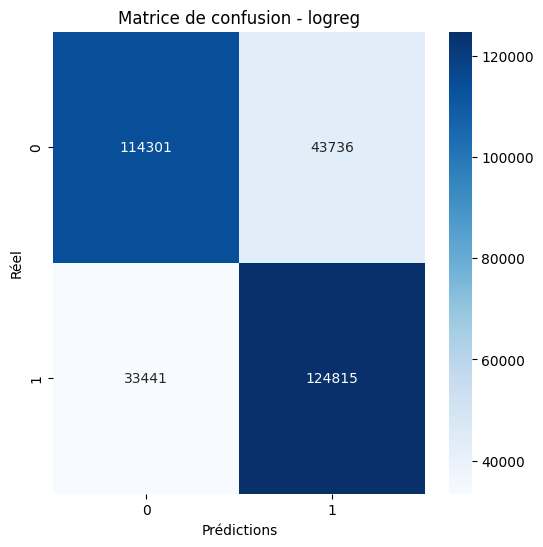


📊 Résultats pour : rf
              precision    recall  f1-score   support

           0       0.73      0.75      0.74    158037
           1       0.74      0.72      0.73    158256

    accuracy                           0.73    316293
   macro avg       0.73      0.73      0.73    316293
weighted avg       0.73      0.73      0.73    316293



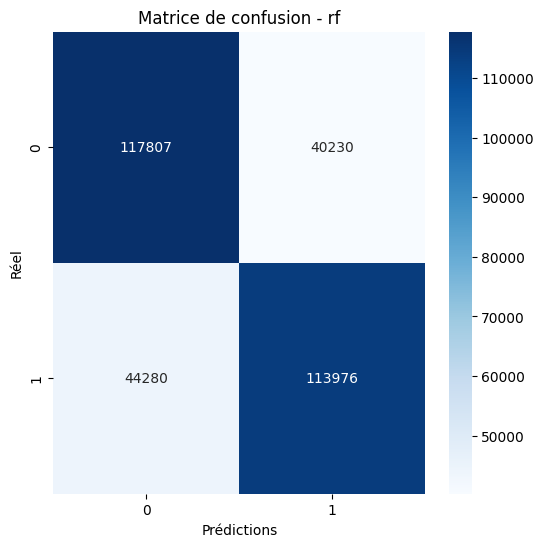

9885/9885 ━━━━━━━━━━━━━━━━━━━━ 8s 744us/step

📊 Résultats pour : lstm
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    158037
           1       0.77      0.79      0.78    158256

    accuracy                           0.77    316293
   macro avg       0.77      0.77      0.77    316293
weighted avg       0.77      0.77      0.77    316293



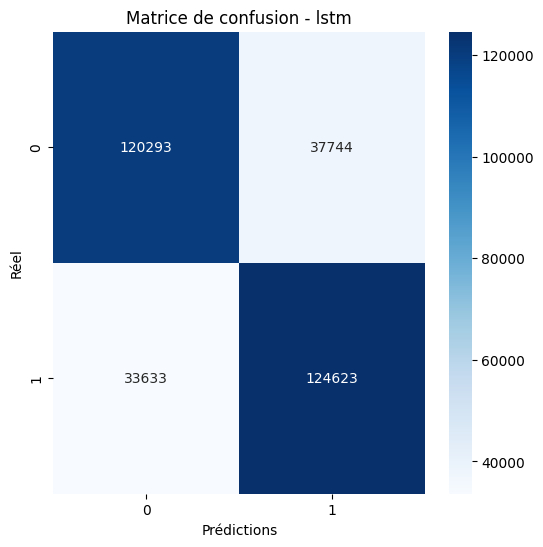


📊 Résultats pour : lgbm
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1505
           1       0.71      0.72      0.72      1495

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



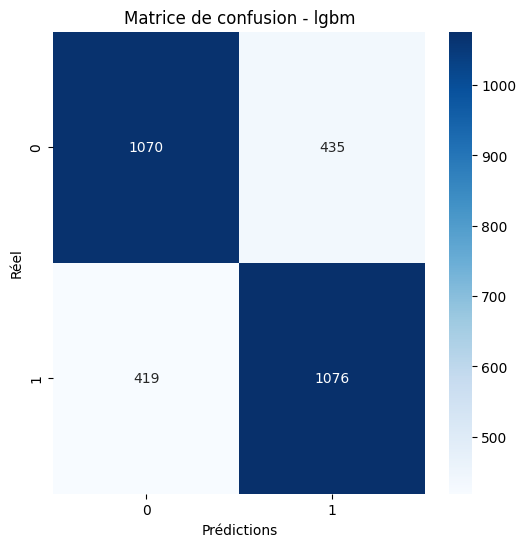


📊 Comparaison finale des modèles :


,Modèle,Accuracy,F1-score
0,logreg,0.7560,0.7638
1,rf,0.7328,0.7295
2,lstm,0.7743,0.7774
3,lgbm,0.7153,0.7159
4,DistilBERT fine-tuné,0.8423,0.8427


✅ Run terminé.


In [21]:
df_results = ev.get_all_model_scores(models_dict, datasets_dict)

# 9 - Tracking MLFlow

In [22]:
y_pred = log_reg_model.predict(X_tfidf_test)
mlflow.log_param("model", "Logistic Regression")
mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

In [23]:
if mlflow.active_run() is not None:
    mlflow.end_run()

In [24]:
with mlflow.start_run():
    # entraînement modèle, log params & metrics
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

# A désactiver en production

In [25]:
utils.launch_mlflow_ui()

🚀 MLFlow UI lancé sur http://127.0.0.1:5000


In [26]:
# mlflow.end_run()  # Pour stopper tout run en cours
